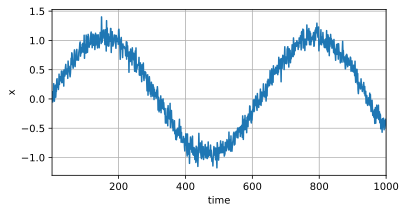

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l
from torch import nn

T = 1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(time*0.01) + torch.normal(0.05,0.1,size=(T,))
d2l.plot(time,[x], 'time', 'x', xlim=[1,1000], figsize=(6,3))


In [ ]:
tau = 4
features = torch.zeros((T-tau, tau))
labels = torch.zeros(T-tau,1)
for i in range(features.shape[0]):
    features[i,:] = x[i:i+4]
    labels[i] = x[i+4]
# tau = 4
# features = torch.zeros((T- tau, tau))
# for i in range(tau):
#     features[:, i] = x[i: T- tau + i]
# labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]), batch_size=batch_size, is_train=True)

In [24]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(
        nn.Linear(4, 10),
        nn.ReLU(),
        nn.Linear(10, 1)
    )

    net.apply(init_weights)

    return net

loss = nn.MSELoss()


In [27]:
def train(net, train_iter, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)

    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch + 1}, ' f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, 5, 0.01)

epoch 1, loss: 0.030108
epoch 2, loss: 0.017747
epoch 3, loss: 0.016611
epoch 4, loss: 0.015992
epoch 5, loss: 0.014606


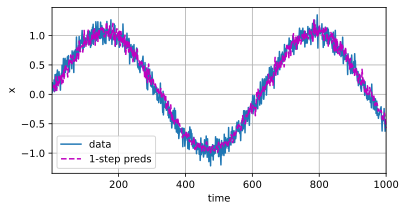

In [28]:
onestep_preds = net(features)
d2l.plot([time, time[tau:]],
 [x.detach().numpy(), onestep_preds.detach().numpy()], 'time',
 'x', legend=['data', '1-step preds'], xlim=[1, 1000],
 figsize=(6, 3))

In [ ]:
def sequence_mask(X, valid_len, value = 0):
    max_len = X.size(1)
    mask = torch.arange((max_len), dtype = torch.float32, device=X.device)[None, :] < valid_len[: None]
    return mask

X = torch.ones(2,3,4)
sequence_mask(X, torch.tensor([1,2]))
sequence_mask

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1